# Текст и поясняющие надписи

In [1]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')

## Пример: влияние выходных дней на рождение детей в США

In [2]:
birth = pd.read_csv('data/births.csv')
birth

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [3]:
quartiles = np.percentile(birth['births'], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [4]:
mu, sig = quartiles[1], 0.74 *(quartiles[2] - quartiles[0])
mu, sig

(4814.0, 689.31)

In [5]:
birth = birth.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
birth
# очистили данные от экстремумов

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [6]:
birth['day'] = birth['day'].astype(int)
birth.index = pd.to_datetime(10000 * birth.year +
                             100 * birth.month +
                             birth.day,
                             format='%Y%m%d')
birth

C:\Users\Admin\AppData\Local\Temp/ipykernel_10872/964364210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth['day'] = birth['day'].astype(int)


,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548
...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944
1988-12-30,1988,12,30,F,5742
1988-12-30,1988,12,30,M,6095
1988-12-31,1988,12,31,F,4435


In [7]:
birth_by_date = birth.pivot_table('births', 
                                  [birth.index.month, birth.index.day])

birth_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [8]:
birth_by_date.index = [pd.datetime(2012, month, day) for (month, day) in birth_by_date.index]
birth_by_date

C:\Users\Admin\AppData\Local\Temp/ipykernel_10872/2828919355.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  birth_by_date.index = [pd.datetime(2012, month, day) for (month, day) in birth_by_date.index]


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


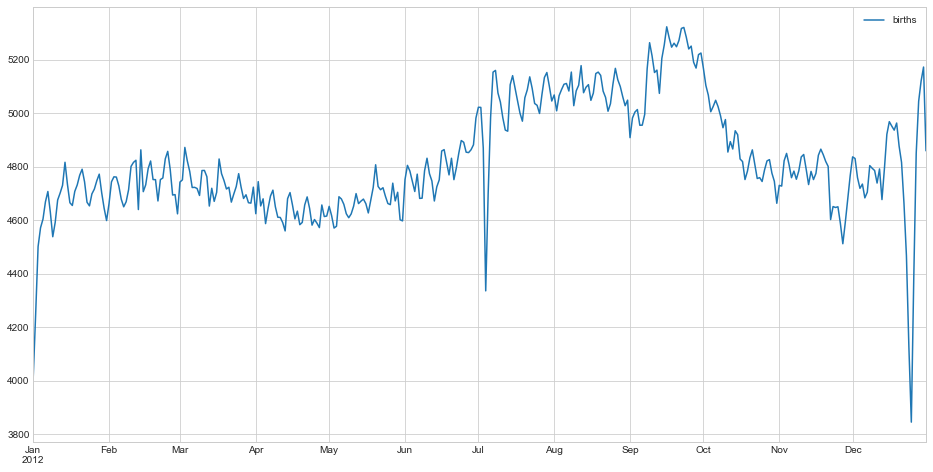

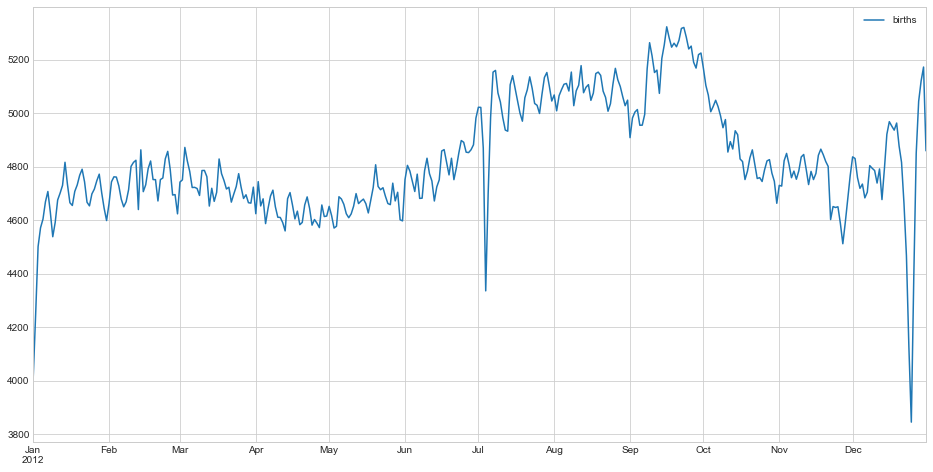

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
birth_by_date.plot(ax=ax)
fig

Можно снабдить эл-ты графика пояснениями, при помощи ``plt.text()`` или ``ax.text()``, которые поместят текст в нужное место, в соответствии с конкретными значениями координат ``(x, y)``

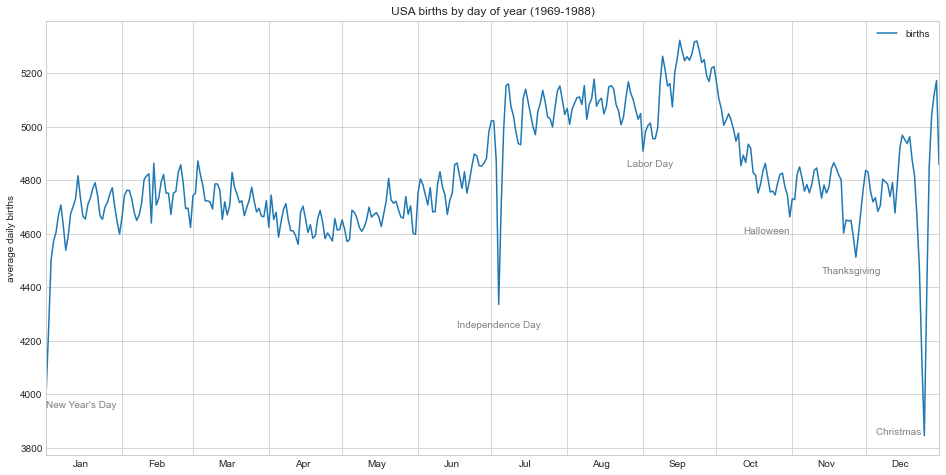

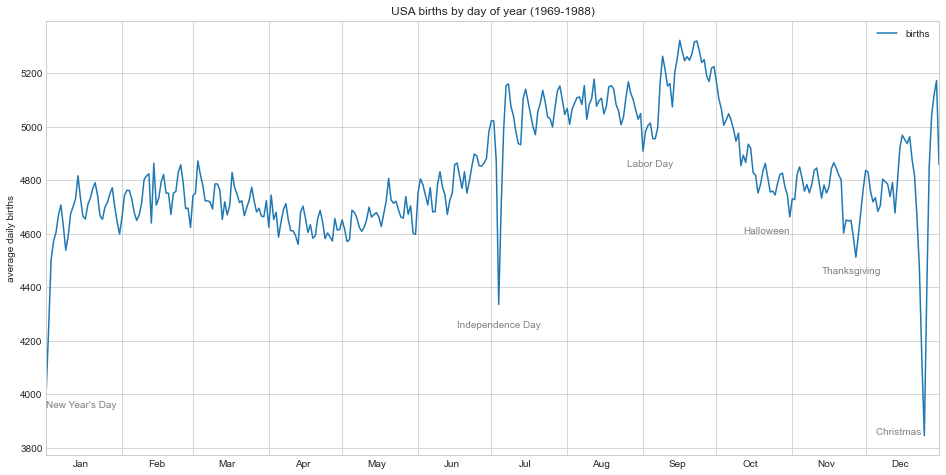

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
birth_by_date.plot(ax=ax)

# добавляем метки на график
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style) # ha='center' выравнивание текста по центру
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Добавляем метки для осей координат
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Размечаем ось X центрированными метками для месяцев
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
# fig

In [11]:
# ax.text?
# Parameters
# ----------
# x, y : float
#     The position to place the text. By default, this is in data
#     coordinates. The coordinate system can be changed using the
#     *transform* parameter.

# s : str
#     The text.

# fontdict : dict, default: None
#     A dictionary to override the default text properties. If fontdict
#     is None, the defaults are determined by `.rcParams`.

# Returns
# -------
# `.Text`
#     The created `.Text` instance.

# Other Parameters
# ----------------
# **kwargs : `~matplotlib.text.Text` properties.
#     Other miscellaneous text parameters.

#     Properties:
#     agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
#     alpha: scalar or None
#     animated: bool
#     backgroundcolor: color
#     bbox: dict with properties for `.patches.FancyBboxPatch`
#     clip_box: `.Bbox`
#     clip_on: bool
#     clip_path: Patch or (Path, Transform) or None
#     color or c: color
#     contains: unknown
#     figure: `.Figure`
#     fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
#     fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
#     fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
#     fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
#     fontstyle or style: {'normal', 'italic', 'oblique'}
#     fontvariant or variant: {'normal', 'small-caps'}
#     fontweight or weight: {a numeric value in range 0-1000, 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'}
#     gid: str
#     horizontalalignment or ha: {'center', 'right', 'left'}
#     in_layout: bool
#     label: object
#     linespacing: float (multiple of font size)
#     math_fontfamily: str
#     multialignment or ma: {'left', 'right', 'center'}
#     path_effects: `.AbstractPathEffect`
#     picker: None or bool or float or callable
#     position: (float, float)
#     rasterized: bool
#     rotation: float or {'vertical', 'horizontal'}
#     rotation_mode: {None, 'default', 'anchor'}
#     sketch_params: (scale: float, length: float, randomness: float)
#     snap: bool or None
#     text: object
#     transform: `.Transform`
#     transform_rotates_text: bool
#     url: str
#     usetex: bool or None
#     verticalalignment or va: {'center', 'top', 'bottom', 'baseline', 'center_baseline'}
#     visible: bool
#     wrap: bool
#     x: float
#     y: float
#     zorder: float

## Преобразования и координаты текста

Существует 3 предопределенных преобразования м/у различными системами координат:

- ``ax.transData``: Преобразование из системы координат данных
- ``ax.transAxes``: Преобразование из системы координат объекта ``Axes`` (в единицах размеров рисунка)
- ``fig.transFigure``: Преобразование из системы координат объекта ``Figure`` (в единицах размеров рисунка)

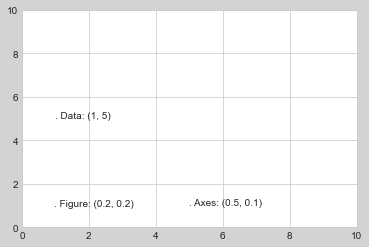

In [12]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData - значение по умолчанию
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

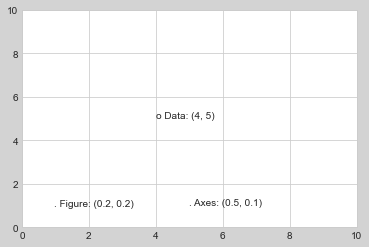

In [13]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData - значение по умолчанию
ax.text(4, 5, "o Data: (4, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

(-6.0, 6.0)

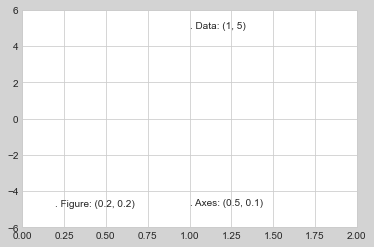

In [14]:
# если поменять пределы осей, то это повлияет только на ax.transData
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData - значение по умолчанию
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)

In [15]:
# %matplotlib notebook # бэкенд запускается только в начале ноута, и потом уже не меняется
# кстати бэк notebook рисует график только после fig
# тогда точки Axes Figuer остаются неподвижны, при прокрутке осей

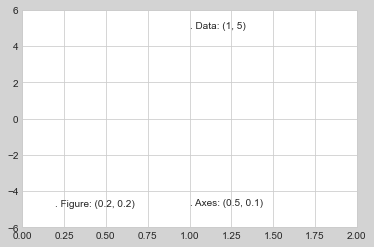

In [16]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Стрелки и поясняющие надписи

- ``plt.arrow()`` - не рекомендуется, созданная ею стрелка подвержена изменению в зависимости от соотношения сторон
- ``plt.annotate()`` - создает текст и стрелку, с гибкими настройками

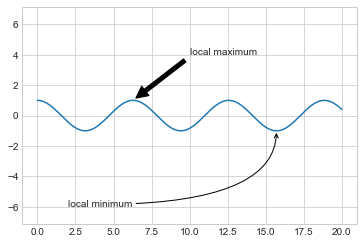

In [17]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05)) # arrowprops - словарь с параметрами определяющий стиль стрелки

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

In [18]:
# ax.annotate?
# Parameters
# ----------
# text : str
#     The text of the annotation.

# xy : (float, float)
#     The point *(x, y)* to annotate. The coordinate system is determined
#     by *xycoords*.

# xytext : (float, float), default: *xy*
#     The position *(x, y)* to place the text at. The coordinate system
#     is determined by *textcoords*.

# xycoords : str or `.Artist` or `.Transform` or callable or (float, float), default: 'data'

#     The coordinate system that *xy* is given in. The following types
#     of values are supported:

#     - One of the following strings:

#       ==================== ============================================
#       Value                Description
#       ==================== ============================================
#       'figure points'      Points from the lower left of the figure
#       'figure pixels'      Pixels from the lower left of the figure
#       'figure fraction'    Fraction of figure from lower left
#       'subfigure points'   Points from the lower left of the subfigure
#       'subfigure pixels'   Pixels from the lower left of the subfigure
#       'subfigure fraction' Fraction of subfigure from lower left
#       'axes points'        Points from lower left corner of axes
#       'axes pixels'        Pixels from lower left corner of axes
#       'axes fraction'      Fraction of axes from lower left
#       'data'               Use the coordinate system of the object
#                            being annotated (default)
#       'polar'              *(theta, r)* if not native 'data'
#                            coordinates
#       ==================== ============================================

#       Note that 'subfigure pixels' and 'figure pixels' are the same
#       for the parent figure, so users who want code that is usable in
#       a subfigure can use 'subfigure pixels'.

#     - An `.Artist`: *xy* is interpreted as a fraction of the artist's
#       `~matplotlib.transforms.Bbox`. E.g. *(0, 0)* would be the lower
#       left corner of the bounding box and *(0.5, 1)* would be the
#       center top of the bounding box.

#     - A `.Transform` to transform *xy* to screen coordinates.

#     - A function with one of the following signatures::

#         def transform(renderer) -> Bbox
#         def transform(renderer) -> Transform

#       where *renderer* is a `.RendererBase` subclass.

#       The result of the function is interpreted like the `.Artist` and
#       `.Transform` cases above.

#     - A tuple *(xcoords, ycoords)* specifying separate coordinate
#       systems for *x* and *y*. *xcoords* and *ycoords* must each be
#       of one of the above described types.

#     See :ref:`plotting-guide-annotation` for more details.

# textcoords : str or `.Artist` or `.Transform` or callable or (float, float), default: value of *xycoords*
#     The coordinate system that *xytext* is given in.

#     All *xycoords* values are valid as well as the following
#     strings:

#     =================   =========================================
#     Value               Description
#     =================   =========================================
#     'offset points'     Offset (in points) from the *xy* value
#     'offset pixels'     Offset (in pixels) from the *xy* value
#     =================   =========================================

# arrowprops : dict, optional
#     The properties used to draw a `.FancyArrowPatch` arrow between the
#     positions *xy* and *xytext*. Note that the edge of the arrow
#     pointing to *xytext* will be centered on the text itself and may
#     not point directly to the coordinates given in *xytext*.

#     If *arrowprops* does not contain the key 'arrowstyle' the
#     allowed keys are:

#     ==========   ======================================================
#     Key          Description
#     ==========   ======================================================
#     width        The width of the arrow in points
#     headwidth    The width of the base of the arrow head in points
#     headlength   The length of the arrow head in points
#     shrink       Fraction of total length to shrink from both ends
#     ?            Any key to :class:`matplotlib.patches.FancyArrowPatch`
#     ==========   ======================================================

#     If *arrowprops* contains the key 'arrowstyle' the
#     above keys are forbidden.  The allowed values of
#     ``'arrowstyle'`` are:

#     ============   =============================================
#     Name           Attrs
#     ============   =============================================
#     ``'-'``        None
#     ``'->'``       head_length=0.4,head_width=0.2
#     ``'-['``       widthB=1.0,lengthB=0.2,angleB=None
#     ``'|-|'``      widthA=1.0,widthB=1.0
#     ``'-|>'``      head_length=0.4,head_width=0.2
#     ``'<-'``       head_length=0.4,head_width=0.2
#     ``'<->'``      head_length=0.4,head_width=0.2
#     ``'<|-'``      head_length=0.4,head_width=0.2
#     ``'<|-|>'``    head_length=0.4,head_width=0.2
#     ``'fancy'``    head_length=0.4,head_width=0.4,tail_width=0.4
#     ``'simple'``   head_length=0.5,head_width=0.5,tail_width=0.2
#     ``'wedge'``    tail_width=0.3,shrink_factor=0.5
#     ============   =============================================

#     Valid keys for `~matplotlib.patches.FancyArrowPatch` are:

#     ===============  ==================================================
#     Key              Description
#     ===============  ==================================================
#     arrowstyle       the arrow style
#     connectionstyle  the connection style
#     relpos           default is (0.5, 0.5)
#     patchA           default is bounding box of the text
#     patchB           default is None
#     shrinkA          default is 2 points
#     shrinkB          default is 2 points
#     mutation_scale   default is text size (in points)
#     mutation_aspect  default is 1.
#     ?                any key for :class:`matplotlib.patches.PathPatch`
#     ===============  ==================================================

#     Defaults to None, i.e. no arrow is drawn.

# annotation_clip : bool or None, default: None
#     Whether to draw the annotation when the annotation point *xy* is
#     outside the axes area.

#     - If *True*, the annotation will only be drawn when *xy* is
#       within the axes.
#     - If *False*, the annotation will always be drawn.
#     - If *None*, the annotation will only be drawn when *xy* is
#       within the axes and *xycoords* is 'data'.

# **kwargs
#     Additional kwargs are passed to `~matplotlib.text.Text`.

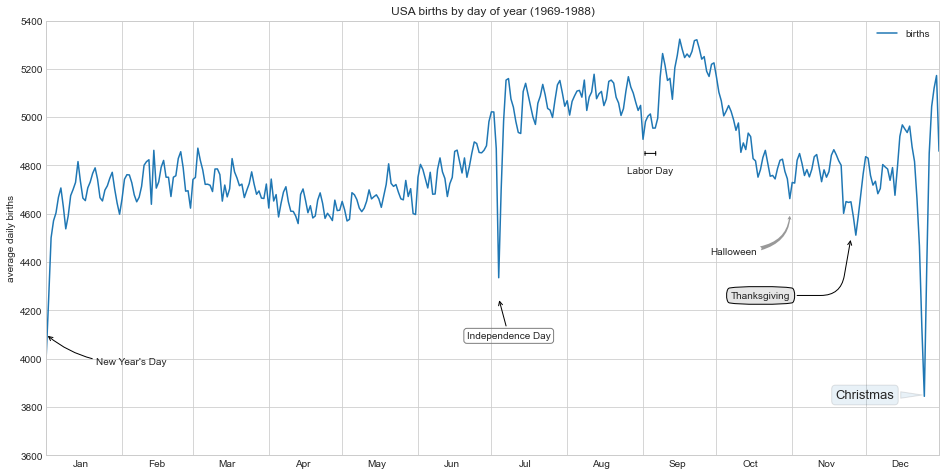

In [20]:
fig, ax = plt.subplots(figsize=(16, 8))
birth_by_date.plot(ax=ax)

# Добавляем метки
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

# Метки для осей
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Размечаем ось x центрированными метками для месяцев
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

ax.set_ylim(3600, 5400);